# Statistics for Data Science with Python
## Project Case: Boston Housing Data

You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?
Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?
Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Details regarding the project will be broken down in the next reading sections.

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

### Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

%matplotlib inline

### Read the CSV file from the URL

In [10]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url, index_col=0)

In [11]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### Exploratory Data Analysis

In [13]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


In [14]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Task 4: Generate Descriptive Statistics and Visualizations

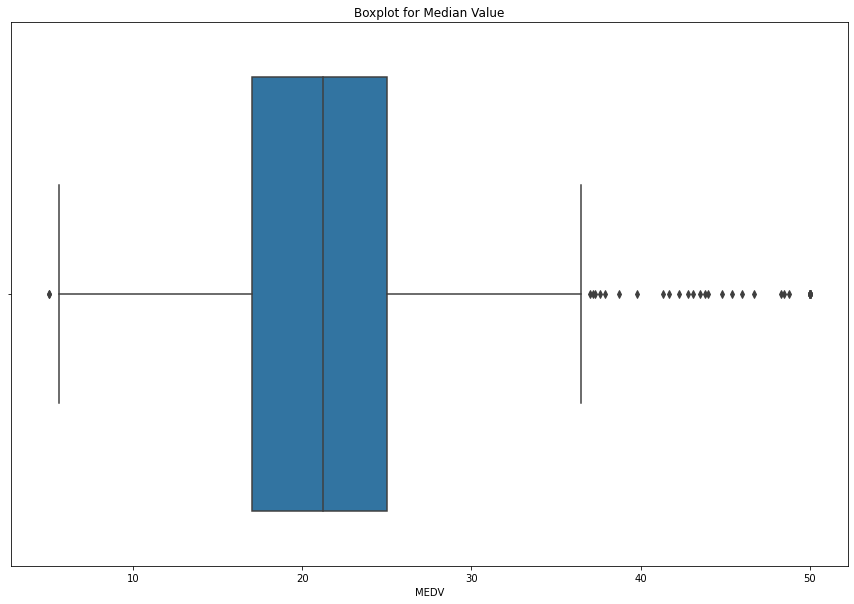

In [35]:
# Boxplot for the "Median value of owner-occupied homes"
plt.figure(figsize=(15,10))
sns.boxplot(x=boston_df.MEDV)
plt.title("Boxplot for Median Value")
plt.show()

Conclusion: There is a long tail after the 3rd quartile

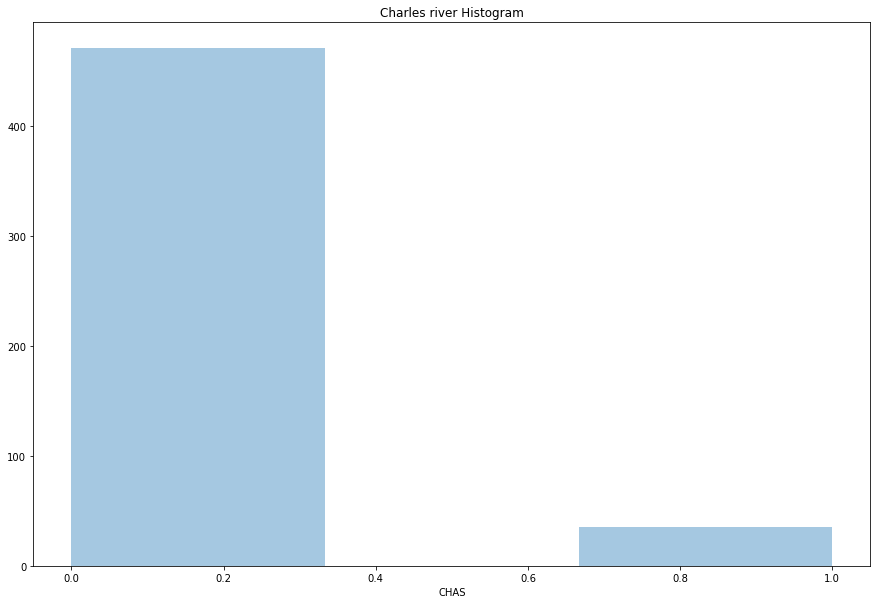

In [43]:
# Charles river variable Histogram
plt.figure(figsize=(15,10))
sns.distplot(a=boston_df.CHAS,bins=3,kde=False)
plt.title("Charles river Histogram")
plt.show()

Conclusion: Most of the tracts are not river bound

In [29]:
# MEDV vs. AGE Boxplot, discretize to three groups
boston_df.loc[(boston_df["AGE"]<=35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"]>35)&(boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"]>=70),'age_group'] = '70 years and older'
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


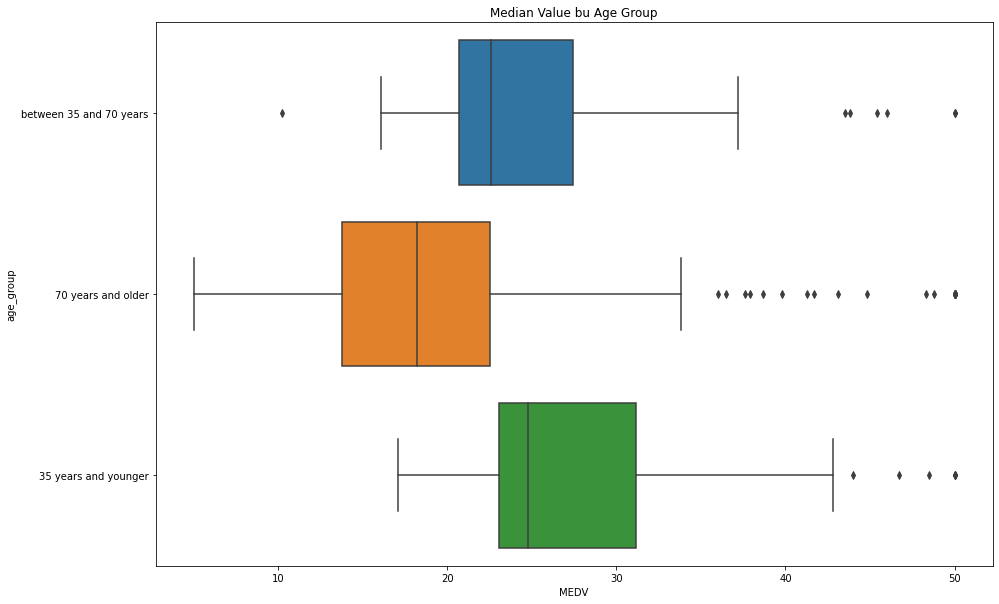

In [36]:
plt.figure(figsize=(15,10))
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df)
plt.title("Median Value bu Age Group")
plt.show()

Conclusion: As expected, older houses has a lower median value and more spread than newer houses

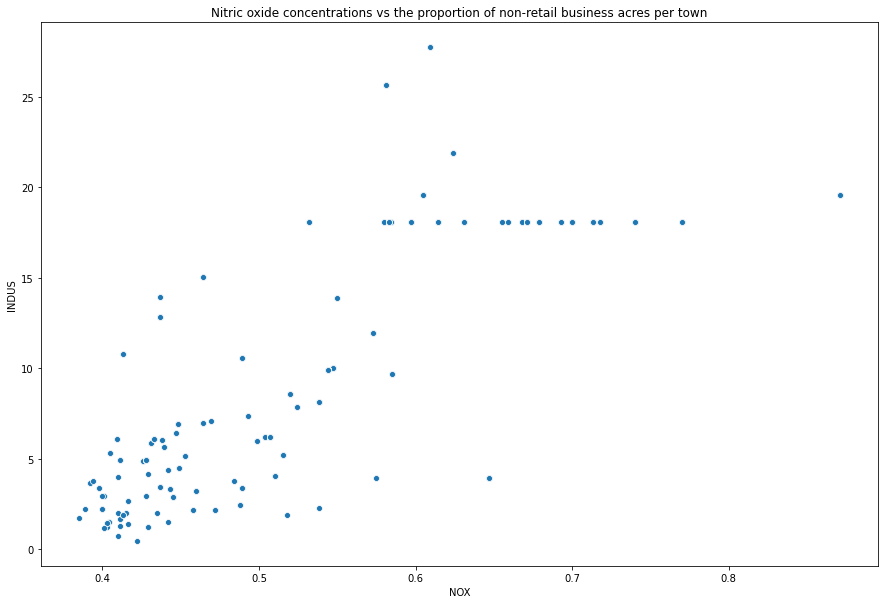

In [38]:
# Nitric oxide concentrations vs the proportion of non-retail business acres per town Scatterplot
plt.figure(figsize=(15,10))
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
plt.title("Nitric oxide concentrations vs the proportion of non-retail business acres per town")
plt.show()

Conclusion: There is a positive linear relation between the Nitric oxide concentrations and the proportion of non-retail business acres per town

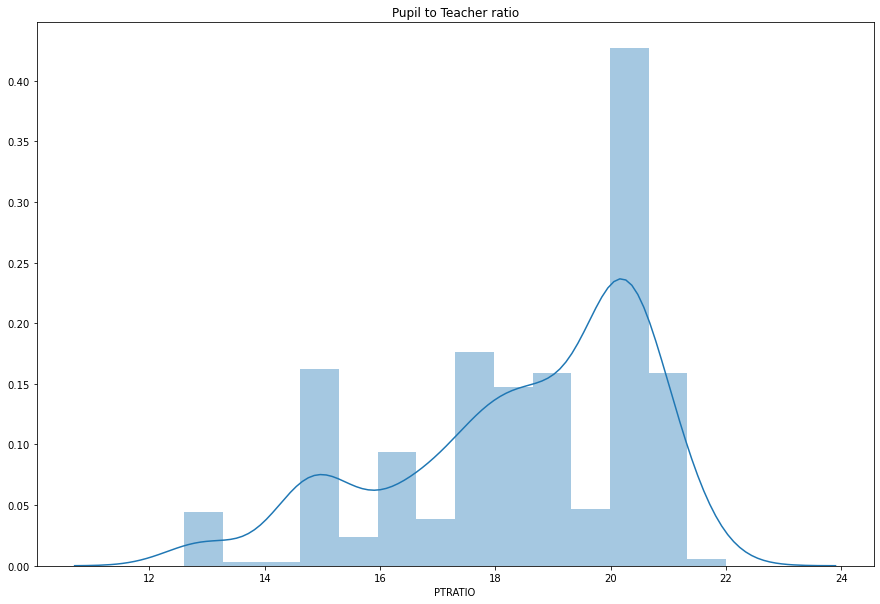

In [44]:
# Pupil to teacher ratio Histogram
plt.figure(figsize=(15,10))
sns.distplot(boston_df.PTRATIO)
plt.title("Pupil to Teacher ratio")
plt.show()

Conclusion: Pupil to teacher ratio is positive skewed and have a peak in the 20-21 bin

### Task 5: Use the appropriate tests to answer the questions provided.

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

Null Hypothesis: Average median value is the same for houses bounded or not boundes by the Charles River

Alternative Hypothesis: Average median value is NOT the same for houses bounded or not boundes by the Charles River

In [52]:
bounded = boston_df[boston_df["CHAS"] == 1]["MEDV"]
not_bounded = boston_df[boston_df["CHAS"] == 0]["MEDV"]
scipy.stats.ttest_ind(bounded,not_bounded,axis=0,equal_var=True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

P_value = 7.39e-05 < alpha = 0.05

Conclusion: We reject the null hypothesis as there is sufficient evidence that the median values are not the same 

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

Null Hypothesis: There is no difference in median values of houses for the Age groups

Alternative Hypothesis: At lease one of the median values of the Age groups is different

In [65]:
younger_than_35 = boston_df[boston_df['age_group']=='35 years and younger']['MEDV']
between_35_and_70 = boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV']
older_than_70 = boston_df[boston_df['age_group']=='70 years and older']['MEDV']

f_stats, p_value = scipy.stats.f_oneway(younger_than_35,between_35_and_70,older_than_70,axis=0)

print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


P_value = 1.71e-15 < alpha = 0.05

Conclusion: We reject the null hypothesis as there is significant evidence that at least one of the means is different

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

Null Hypothesis: Nitric oxide concentrations is NOT correlated with the proportion of non-retail business acres per town

Alternative Hypothesis: Nitric oxide concentrations is correlated with the proportion of non-retail business acres per town

In [68]:
pearson,p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.763651446920915, P-value=7.913361061239593e-98


P_value = 7.91e-98 < alpha = 0.05

Conclusion: We reject the null hypothesis as there is significant evidence that the Nitric oxide concentrations is correlated with the proportion of non-retail business acres per town

**What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

Null Hypothesis: The weighted distances to the five Boston employment centres are NOT related to median value

Alternative Hypothesis: The weighted distances to the five Boston employment centres are related to median value

In [73]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 21 May 2021   Prob (F-statistic):           1.21e-08
Time:                        17:55:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Correlation coefficient is the square root of the R-Squared 0.062 value
np.sqrt(0.062)

0.24899799195977465

In [ ]:
P_value = 1.21e-08 < alpha = 0.05

Conclusion: We reject the null hypothesis as there is significant evidence that the weighted distances to the five Boston employment centres are related to median value.

The correlation coefficcient of 0.249 implies a weak correlation between the features